In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from time import process_time
from scipy.io import loadmat

N = 4

In [4]:
pd = '' #path with data

In [5]:
data = loadmat(pd+'dataAnswer_regular_from_0_to_3pion4.mat')
answers_reg_ = np.transpose(np.array(data['answers']))
data = loadmat(pd+'dataChoi3_sn_regular_from_0_to_3pion4.mat')
chois_reg_ = np.array(data['choi'])

data = loadmat(pd+'dataAnswer_regular_otherY_from_0_to_3pion4.mat')
answers_Y = np.transpose(np.array(data['answers']))
data = loadmat(pd+'dataChoi3_sn_regular_otherY_from_0_to_3pion4.mat')
chois_Y = np.array(data['choi'])

chois_reg = np.concatenate((chois_reg_, chois_Y), axis=0)
answers_reg = np.concatenate((answers_reg_, answers_Y), axis=0)

data = loadmat(pd+'dataAnswer_regular_3pion8.mat')
answers_other1 = np.transpose(np.array(data['answers']))
data = loadmat(pd+'dataChoi3_sn_regular_3pion8.mat')
chois_other1 = np.array(data['choi'])

data = loadmat(pd+'dataAnswer_regular_otherY_3pion8.mat')
answers_other2 = np.transpose(np.array(data['answers']))
data = loadmat(pd+'dataChoi3_sn_regular_otherY_3pion8.mat')
chois_other2 = np.array(data['choi'])

chois_other = np.concatenate((chois_other1, chois_other2), axis=0)
answers_other = np.concatenate((answers_other1, answers_other2), axis=0)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.linear_model import Ridge

In [5]:
X = chois_reg
y = answers_reg

print([X.shape, y.shape])

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.1, random_state=777)

X_other = chois_other
y_other = answers_other
print([y_train.shape, y_test.shape, np.sum(y)/y.size])

[(60000, 15), (60000, 1)]
[(54000, 1), (6000, 1), 0.6651]


In [6]:
h = .02 
names = [ "Random Forest    "]
classifiers = [ RandomForestClassifier(max_depth=13, n_estimators=100)]

In [7]:
name = names[0]
clf = classifiers[0]
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=13)

In [8]:
score0 = clf.score(X_train, y_train)
score = clf.score(X_test, y_test)
score_other = clf.score(X_other, y_other)
y_t = clf.predict(X_train)
y_p = clf.predict(X_other)
f1_t = metrics.f1_score(y_train, y_t)
f1_p = metrics.f1_score(y_other, y_p)
auc_t = metrics.roc_auc_score(y_train, y_t)
auc_p = metrics.roc_auc_score(y_other, y_p)
print((name+"   {:.3f};   {:.3f};   {:.3f};   {:.3f};   {:.3f};   {:.3f};   {:.3f}").format(score0, score, score_other, f1_t, f1_p, auc_t, auc_p))

Random Forest       0.998;   0.990;   0.988;   0.999;   0.991;   0.998;   0.984


In [9]:
print([(y_t.reshape(y_t.size)!=y_train.reshape(y_t.size)).shape, X_train.shape])
x_train_false = X_train[np.transpose(np.tile(y_t.reshape(y_t.size)!=y_train.reshape(y_t.size), (X_train.shape[1], 1)))].reshape(-1,15)
x_train_true = X_train[np.transpose(np.tile(y_t.reshape(y_t.size)==y_train.reshape(y_t.size), (X_train.shape[1], 1)))].reshape(-1,15)
x_proba_false = clf.predict_proba(x_train_false)
x_proba_true = clf.predict_proba(x_train_true)

[(54000,), (54000, 15)]


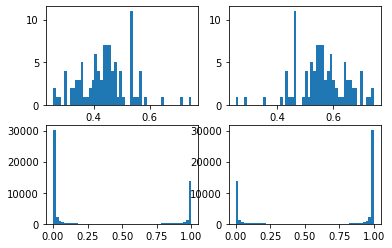

In [10]:
import matplotlib.pyplot as plt
plt.subplot(2, 2, 1)
n, bins, patches = plt.hist(x_proba_false[:,0], 50)
plt.subplot(2, 2, 2)
n, bins, patches = plt.hist(x_proba_false[:,1], 50)
plt.subplot(2, 2, 3)
n, bins, patches = plt.hist(x_proba_true[:,0], 50)
plt.subplot(2, 2, 4)
n, bins, patches = plt.hist(x_proba_true[:,1], 50)
plt.show()

In [11]:
X_train_cor = np.concatenate((X_train, clf.predict_proba(X_train)), axis=1)
X_test_cor = np.concatenate((X_test, clf.predict_proba(X_test)), axis=1)
X_other_cor = np.concatenate((X_other, clf.predict_proba(X_other)), axis=1)
y_train_cor = clf.predict(X_train).reshape(y_train.size)!=y_train.reshape(y_train.size)
y_test_cor = clf.predict(X_test).reshape(y_test.size)!=y_test.reshape(y_test.size)
y_other_cor = clf.predict(X_other).reshape(y_other.size)!=y_other.reshape(y_other.size)


In [12]:
names_cor = [
    "Nearest Neighbors", 
    "Linear SVM       ",
    "Poly SVM         ",
    "sigmoid SVM      ",
    "RBF SVM          ", 
    "Decision Tree    ",
    "Random Forest    ",
    "Neural Net       ",
    "AdaBoost         ",
    "Naive Bayes      ",
    "LDA              ",
    "QDA              "
    ]

classifiers_cor = [ 
    KNeighborsClassifier(3),
    SVC(kernel="linear"),
    SVC(kernel="poly", degree=3),
    SVC(kernel="sigmoid"),
    SVC(),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=0.01,hidden_layer_sizes=[32, 8]),
    AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=100),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis() 
    ]

In [13]:
for name_cor, clf_cor in zip(names_cor, classifiers_cor):
    clf_cor.fit(X_train_cor, y_train_cor)
    score0 = clf_cor.score(X_train_cor, y_train_cor)
    score = clf_cor.score(X_test_cor, y_test_cor)
    score_other = clf_cor.score(X_other_cor, y_other_cor)
    y_t = clf_cor.predict(X_train_cor)
    y_p = clf_cor.predict(X_other_cor)
    
    
    f1_t = metrics.f1_score(y_train_cor, y_t)
    f1_p = metrics.f1_score(y_other_cor, y_p)
    auc_t = metrics.roc_auc_score(y_train_cor, y_t)
    auc_p = metrics.roc_auc_score(y_other_cor, y_p)
    
    print((name_cor+"   {:.5f};   {:.5f};   {:.5f};   {:.5f};   {:.5f};   {:.5f};   {:.5f}").format(score0, score, score_other, f1_t, f1_p, auc_t, auc_p))    

Nearest Neighbors   0.99967;   0.99217;   0.98350;   0.90816;   0.20290;   0.94494;   0.58091
Linear SVM          0.99815;   0.98983;   0.98750;   0.00000;   0.00000;   0.50000;   0.50000
Poly SVM            0.99815;   0.98983;   0.98750;   0.00000;   0.00000;   0.50000;   0.50000
sigmoid SVM         0.99815;   0.98983;   0.98750;   0.00000;   0.00000;   0.50000;   0.50000
RBF SVM             0.99815;   0.98983;   0.98750;   0.00000;   0.00000;   0.50000;   0.50000
Decision Tree       0.99963;   0.99150;   0.98670;   0.89796;   0.29630;   0.93993;   0.61018
Random Forest       0.99889;   0.99000;   0.98760;   0.57143;   0.04615;   0.70000;   0.51190
Neural Net          0.99815;   0.98983;   0.98750;   0.00000;   0.00000;   0.50000;   0.50000
AdaBoost            1.00000;   0.99167;   0.98740;   1.00000;   0.07353;   1.00000;   0.51970
Naive Bayes         0.99820;   0.99067;   0.98530;   0.46995;   0.05161;   0.71463;   0.51468
LDA                 0.99702;   0.98900;   0.98740;   0.00000

In [14]:
clf_cor = DecisionTreeClassifier(max_depth=5)
clf_cor.fit(X_train_cor, y_train_cor)

answer_nn = clf.predict(chois_reg)
answer_o = clf.predict(chois_other)
clf_proba = clf.predict_proba(chois_reg)[:, 0]
clf_proba = np.logical_and(clf_proba > 0.3, clf_proba < 0.7)
clf_proba_o = clf.predict_proba(chois_other)[:, 0]
clf_proba_o = np.logical_and(clf_proba_o > 0.3, clf_proba_o < 0.7)

chois_reg_cor = np.concatenate((chois_reg, clf.predict_proba(chois_reg)), axis=1)
answer_cor = clf_cor.predict(chois_reg_cor)

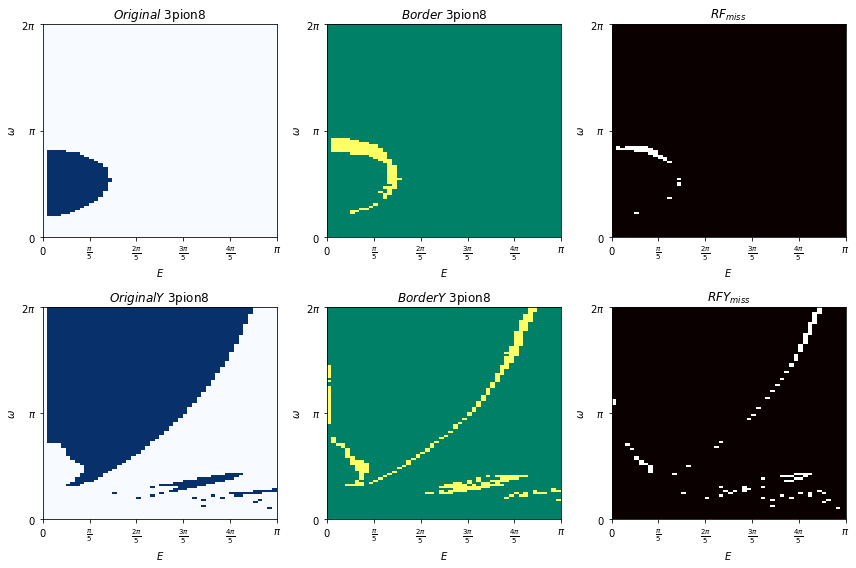

In [15]:
def plt_text():
    plt.xticks([0, 10, 20, 30, 40, 50],[r'$0$',r'$\frac{\pi}{5}$',r'$\frac{2\pi}{5}$',r'$\frac{3\pi}{5}$',r'$\frac{4\pi}{5}$',r'$\pi$'])
    plt.yticks([0, 50, 100],[r'$0$',r'$\pi$',r'$2\pi$'])
    plt.xlabel(r'$E$')
    plt.ylabel(r'$\omega$')


plt.rcParams['figure.figsize'] = (12, 8)
N1 = 0
N2 = 5000

ax = plt.subplot(231)
c = ax.pcolormesh(np.transpose(np.reshape(answers_other[N1:N1+5000], (50,100))), cmap='Blues_r')
plt_text()
ax.set_title(r'$Original$ 3pion8')

ax = plt.subplot(234)
c = ax.pcolormesh(np.transpose(np.reshape(answers_other[N2:N2+5000], (50,100))), cmap='Blues_r')
plt_text()
ax.set_title(r'$Original Y$ 3pion8')

ax = plt.subplot(232)
c = ax.pcolormesh(np.transpose(np.reshape(clf_proba_o[N1:N1+5000], (50,100))), cmap='summer')
plt_text()
ax.set_title(r'$Border$ 3pion8')

ax = plt.subplot(235)
c = ax.pcolormesh(np.transpose(np.reshape(clf_proba_o[N2:N2+5000], (50,100))), cmap='summer')
plt_text()
ax.set_title(r'$Border Y$ 3pion8')


miss = np.transpose(np.logical_xor(answer_o, np.transpose(answers_other)))
ax = plt.subplot(233)
c = ax.pcolormesh(np.transpose(np.reshape(miss[N1:N1+5000], (50,100))), cmap='hot')
plt_text()
ax.set_title(r'$RF_{miss}$')

ax = plt.subplot(236)
c = ax.pcolormesh(np.transpose(np.reshape(miss[N2:N2+5000], (50,100))), cmap='hot')
plt_text()
ax.set_title(r'$RF Y_{miss}$')
'''
ax = plt.subplot(247)
c = ax.pcolormesh(np.transpose(np.reshape(answer_cor[N1:N1+5000], (50,100))), cmap='summer')
plt_text()
ax.set_title(r'$Cor$')

ax = plt.subplot(248)
c = ax.pcolormesh(np.transpose(np.reshape(answer_cor[N2:N2+5000], (50,100))), cmap='summer')
plt_text()
ax.set_title(r'$Cor Y$')
'''

plt.tight_layout()
plt.show()

In [16]:
answer_rf_other = clf.predict(chois_other)
clf_proba_other = clf.predict_proba(chois_other)[:, 0]
clf_proba_other = np.logical_and(clf_proba_other > 0.4, clf_proba_other < 0.6)

chois_other_cor = np.concatenate((chois_other, clf.predict_proba(chois_other)), axis=1)
answer_other_cor = clf_cor.predict(chois_other_cor)

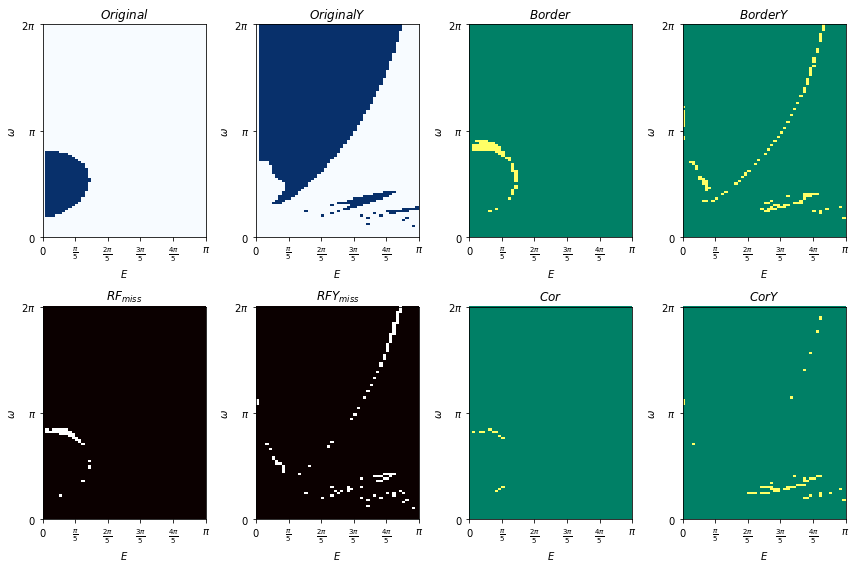

In [17]:

ax = plt.subplot(241)
c = ax.pcolormesh(np.transpose(np.reshape(answers_other[0:5000], (50,100))), cmap='Blues_r')
plt_text()
ax.set_title(r'$Original$')

ax = plt.subplot(242)
c = ax.pcolormesh(np.transpose(np.reshape(answers_other[5000:10000], (50,100))), cmap='Blues_r')
plt_text()
ax.set_title(r'$Original Y$')

ax = plt.subplot(243)
c = ax.pcolormesh(np.transpose(np.reshape(clf_proba_other[0:5000], (50,100))), cmap='summer')
plt_text()
ax.set_title(r'$Border$')

ax = plt.subplot(244)
c = ax.pcolormesh(np.transpose(np.reshape(clf_proba_other[5000:10000], (50,100))), cmap='summer')
plt_text()
ax.set_title(r'$Border Y$')


miss = np.transpose(np.logical_xor(answer_rf_other, np.transpose(answers_other)))
ax = plt.subplot(245)
c = ax.pcolormesh(np.transpose(np.reshape(miss[0:5000], (50,100))), cmap='hot')
plt_text()
ax.set_title(r'$RF_{miss}$')

ax = plt.subplot(246)
c = ax.pcolormesh(np.transpose(np.reshape(miss[5000:10000], (50,100))), cmap='hot')
plt_text()
ax.set_title(r'$RF Y_{miss}$')

ax = plt.subplot(247)
c = ax.pcolormesh(np.transpose(np.reshape(answer_other_cor[0:5000], (50,100))), cmap='summer')
plt_text()
ax.set_title(r'$Cor$')

ax = plt.subplot(248)
c = ax.pcolormesh(np.transpose(np.reshape(answer_other_cor[5000:10000], (50,100))), cmap='summer')
plt_text()
ax.set_title(r'$Cor Y$')

plt.tight_layout()
plt.show()